# Time Series EDA

In [1]:
# 기본 라이브러리 로딩 및 사용자 정의함수 정의

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 

import warnings
warnings.filterwarnings('ignore')


# define universally useful UDFs

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def zrmx_scl(vec):
    vec = vec/vec.max()
    return(vec)

# matplotlib 에서 한글을 표시하기 위한 설정
import matplotlib

font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name) # 한글 표시 가능하도록 폰트 지정 
matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록


# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

In [2]:
# 시계열 챠트

# date type 자료형 처리

## Yearly Data

In [2]:
# Mercedes-Benz GLS class sales

# Structure :: ['year','EUsales','USsales']

glssales = np.array([2006, 3007, 18776,
2007, 8027, 26396,
2008, 4227, 23328,
2009, 2871, 15012,
2010, 2249, 19943,
2011, 2508, 25139,
2012, 1573, 26042,
2013, 4829, 29912,
2014, 4187, 26597,
2015, 3753, 27707,
2016, 5361, 30442,
2017, 4537, 32248,
2018, 3534, 21973])

In [4]:
glssales

array([ 2006,  3007, 18776,  2007,  8027, 26396,  2008,  4227, 23328,
        2009,  2871, 15012,  2010,  2249, 19943,  2011,  2508, 25139,
        2012,  1573, 26042,  2013,  4829, 29912,  2014,  4187, 26597,
        2015,  3753, 27707,  2016,  5361, 30442,  2017,  4537, 32248,
        2018,  3534, 21973])

<AxesSubplot:xlabel='year'>

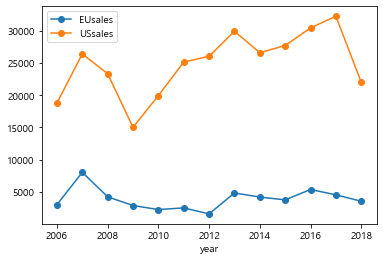

In [6]:
glssalesdf = pd.DataFrame(glssales.reshape(13,3))
# display(glssalesdf)
glssalesdf.columns = ['year','EUsales','USsales']
glssalesdf.index = glssalesdf.year
glssalesdf = glssalesdf[['EUsales','USsales']]
glssalesdf.plot(marker='o')

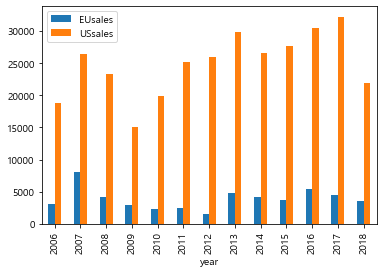

In [7]:
glssalesdf = pd.DataFrame(glssales.reshape(13,3))

# to use pd for plotting set year column one time
glssalesdf.columns = ['year','EUsales','USsales']
glssalesdf1 = glssalesdf

ax = glssalesdf1.set_index('year').plot( kind='bar')

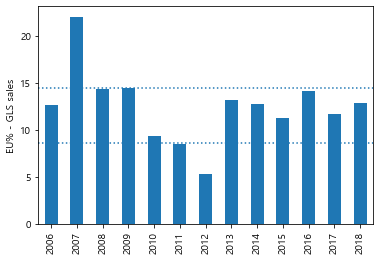

In [6]:
glsEUratio = glssalesdf.EUsales / glssalesdf.sum(axis=1) *100
glsEUratio.plot.bar()
plt.ylabel('EU% - GLS sales')
plt.axhline(glsEUratio.quantile(0.1), linestyle=':')
plt.axhline(glsEUratio.quantile(0.9), linestyle=':')
# X축에 연도 표시
plt.xticks(range(len(glssalesdf)),glssalesdf.year)
plt.show()

## Daily Data EDA

### pandas-datareader 활용 : Collecting Data from the Internet
- remote data access using pandas

In [16]:
# 주식시장 데이터 수집 예제

from pandas_datareader import data as pdr

# Define the instruments to download. We would like to see Apple, Amazon and the S&P500 index.
tickers = ['AAPL', 'AMZN', '^GSPC']

start_date = '2018-1-1'
end_date = '2020-12-04'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
# yahoo finance 에서 데이터 수집
panel_data = pdr.DataReader(tickers, 'yahoo', start_date, end_date)  

print(panel_data.reset_index().columns)
# panel_data.head(7)
panel_data.tail(7)

MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', '^GSPC'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', '^GSPC'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', '^GSPC'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', '^GSPC'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', '^GSPC'),
            (   'Volume',  'AAPL'),
            (   'Volume',  'AMZN'),
            (   'Volume', '^GSPC')],
           names=['Attributes', 'Symbols'])


Attributes   Adj Close                                 Close               \
Symbols           AAPL         AMZN        ^GSPC        AAPL         AMZN   
Date                                                                        
2020-11-24  115.169998  3118.060059  3635.409912  115.169998  3118.060059   
2020-11-25  116.029999  3185.070068  3629.649902  116.029999  3185.070068   
2020-11-27  116.589996  3195.340088  3638.350098  116.589996  3195.340088   
2020-11-30  119.050003  3168.040039  3621.629883  119.050003  3168.040039   
2020-12-01  122.720001  3220.080078  3662.449951  122.720001  3220.080078   
2020-12-02  123.080002  3203.530029  3669.010010  123.080002  3203.530029   
2020-12-03  122.940002  3186.729980  3666.719971  122.940002  3186.729980   

Attributes                     High                                   Low  \
Symbols           ^GSPC        AAPL         AMZN        ^GSPC        AAPL   
Date                                                                        
2020-11-24  3635.409912  115.849998  3134.250000  3642.310059  112.589996   
2020-11-25  3629.649902  116.750000  3198.000000  3635.500000  115.169998   
2020-11-27  3638.350098  117.489998  3216.189941  3644.310059  116.220001   
2020-11-30  3621.629883  120.970001  3228.389893  3634.179932  116.809998   
2020-12-01  3662.449951  123.470001  3248.949951  3678.449951  120.010002   
2020-12-02  3669.010010  123.370003  3232.000000  3670.959961  120.889999   
2020-12-03  3666.719971  123.779999  3228.635010  3682.729980  122.209999   

Attributes                                  Open                            \
Symbols            AMZN        ^GSPC        AAPL         AMZN        ^GSPC   
Date                                                                         
2020-11-24  3086.260010  3594.520020  113.910004  3100.500000  3594.520020   
2020-11-25  3140.260010  3617.760010  115.550003  3141.870117  3635.500000   
2020-11-27  3190.050049  3629.330078  116.570000  3211.260010  3638.550049   
2020-11-30  3125.550049  3594.389893  116.970001  3208.479980  3634.179932   
2020-12-01  3157.179932  3645.870117  121.010002  3188.500000  3645.870117   
2020-12-02  3173.260010  3644.840088  122.019997  3221.649902  3653.780029   
2020-12-03  3181.310059  3657.169922  123.519997  3205.459961  3668.280029   

Attributes       Volume                           
Symbols            AAPL       AMZN         ^GSPC  
Date                                              
2020-11-24  113874200.0  3602100.0  6.267570e+09  
2020-11-25   76499200.0  3790400.0  4.902560e+09  
2020-11-27   46691300.0  2392900.0  2.778450e+09  
2020-11-30  169410200.0  4063900.0  6.291400e+09  
2020-12-01  128166800.0  4544400.0  5.403660e+09  
2020-12-02   88840300.0  3122500.0  5.029620e+09  
2020-12-03   78967630.0  2892039.0  2.643147e+09

In [17]:
# Rearrange Index Format

# 인덱스 재설정 후
cdf = panel_data.reset_index()
# 원하는 컬럼명을 다시 부여
cdf.columns = ['Date', 'AdjClose_AAPL', 'AdjClose_AMZN', 'AdjClose_SnP500', 
               'Close_AAPL', 'Close_AMZN', 'Close_SnP500',
              'Hi_AAPL', 'Hi_AMZN', 'Hi_SnP500',
               'Lo_AAPL', 'Lo_AMZN', 'Lo_SnP500',
              'Opn_AAPL', 'Opn_AMZN', 'Opn_SnP500',
              'Vlm_AAPL', 'Vlm_AMZN', 'Vlm_SnP500']           
cdf.tail()

,Date,AdjClose_AAPL,AdjClose_AMZN,AdjClose_SnP500,Close_AAPL,Close_AMZN,Close_SnP500,Hi_AAPL,Hi_AMZN,Hi_SnP500,Lo_AAPL,Lo_AMZN,Lo_SnP500,Opn_AAPL,Opn_AMZN,Opn_SnP500,Vlm_AAPL,Vlm_AMZN,Vlm_SnP500
732,2020-11-27,116.589996,3195.340088,3638.350098,116.589996,3195.340088,3638.350098,117.489998,3216.189941,3644.310059,116.220001,3190.050049,3629.330078,116.570000,3211.260010,3638.550049,46691300.0,2392900.0,2.778450e+09
733,2020-11-30,119.050003,3168.040039,3621.629883,119.050003,3168.040039,3621.629883,120.970001,3228.389893,3634.179932,116.809998,3125.550049,3594.389893,116.970001,3208.479980,3634.179932,169410200.0,4063900.0,6.291400e+09
734,2020-12-01,122.720001,3220.080078,3662.449951,122.720001,3220.080078,3662.449951,123.470001,3248.949951,3678.449951,120.010002,3157.179932,3645.870117,121.010002,3188.500000,3645.870117,128166800.0,4544400.0,5.403660e+09
735,2020-12-02,123.080002,3203.530029,3669.010010,123.080002,3203.530029,3669.010010,123.370003,3232.000000,3670.959961,120.889999,3173.260010,3644.840088,122.019997,3221.649902,3653.780029,88840300.0,3122500.0,5.029620e+09
736,2020-12-03,122.940002,3186.729980,3666.719971,122.940002,3186.729980,3666.719971,123.779999,3228.635010,3682.729980,122.209999,3181.310059,3657.169922,123.519997,3205.459961,3668.280029,78967630.0,2892039.0,2.643147e+09


- Google Finance has discontinued their API, and as such this feature is deprecated (marked for removal) in Pandas Datareader. Alternatives to Google Finance include Alpha Vantage, Quandl, and IEX.

''

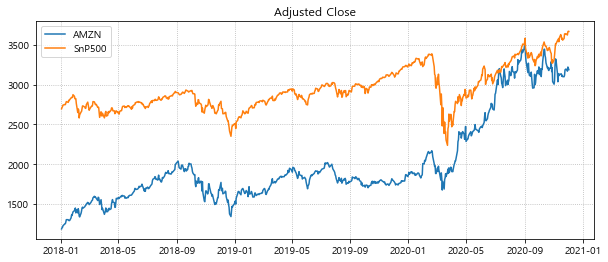

In [18]:
# Sample Plotting

plt.figure(figsize=(10,4))
plt.plot(cdf.Date, cdf.AdjClose_AMZN)
plt.plot(cdf.Date, cdf.AdjClose_SnP500)
plt.legend(['AMZN','SnP500'])
plt.grid(linestyle=':')
plt.title('Adjusted Close')
;

In [12]:
# Date 컬럼은 datetime 포맷으로 지정되어 있음

cdf.dtypes[:5]

Date               datetime64[ns]
AdjClose_AAPL             float64
AdjClose_AMZN             float64
AdjClose_SnP500           float64
Close_AAPL                float64
dtype: object

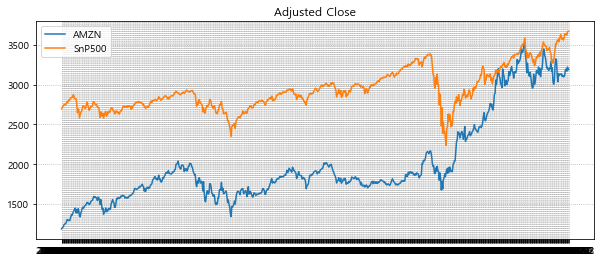

In [15]:
# Sample Plotting

cdf1 = cdf
cdf1['Date'] = cdf1['Date'].astype(str)


plt.figure(figsize=(10,4))
plt.plot(cdf1.Date, cdf1.AdjClose_AMZN)
plt.plot(cdf1.Date, cdf1.AdjClose_SnP500)
plt.legend(['AMZN','SnP500'])
plt.grid(linestyle=':')
plt.title('Adjusted Close')
plt.show()

''

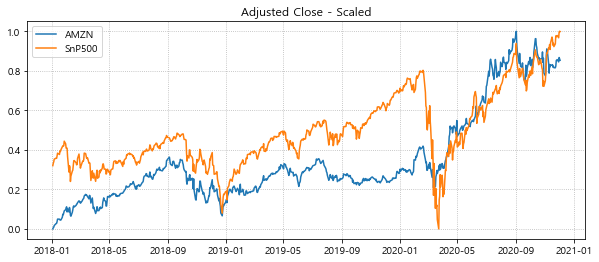

In [19]:
# MinMax Scaling 적용

plt.figure(figsize=(10,4))
plt.plot(cdf.Date, mnmx_scl(cdf.AdjClose_AMZN))
plt.plot(cdf.Date, mnmx_scl(cdf.AdjClose_SnP500))
plt.legend(['AMZN','SnP500'])
plt.grid(linestyle=':')
plt.title('Adjusted Close - Scaled')
;

In [12]:
# 상관관계 확인

np.corrcoef(cdf.AdjClose_AMZN, cdf.AdjClose_SnP500)

array([[1.        , 0.79005977],
       [0.79005977, 1.        ]])

''

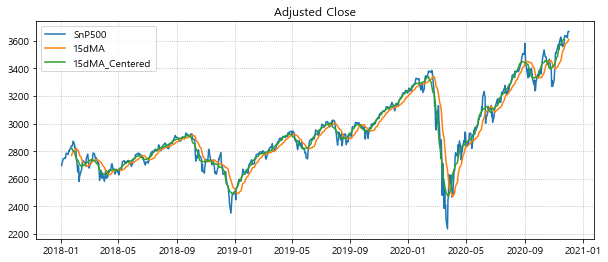

In [21]:
# 5일 이동평균선 추가
rolling_mean = cdf.AdjClose_SnP500.rolling(window=15).mean()
shiftedrolling_mean = cdf.AdjClose_SnP500.shift(-7).rolling(window=15).mean()

plt.figure(figsize=(10,4))
plt.plot(cdf.Date, cdf.AdjClose_SnP500)
plt.plot(cdf.Date, rolling_mean)
plt.plot(cdf.Date, shiftedrolling_mean)
plt.legend(['SnP500', '15dMA', '15dMA_Centered'])
plt.grid(linestyle=':')
plt.title('Adjusted Close')
;

Date
2018-01-31    1309.010946
2018-02-28    1442.363146
2018-03-31    1540.367629
2018-04-30    1468.220471
2018-05-31    1594.903637
Freq: M, Name: AdjClose_AMZN, dtype: float64

Text(0.5, 1.0, 'AdjClose AMZN - Monthly')

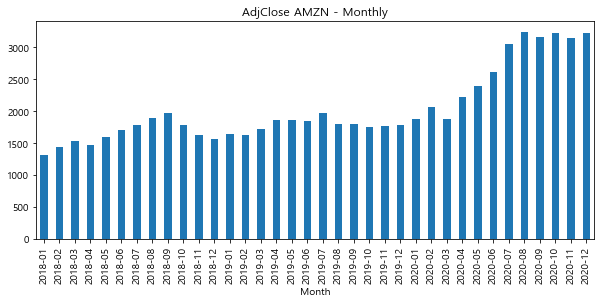

In [14]:
# 월별 평균을 구하고자 한다면

cdf1 = cdf.copy()
cdf1.set_index('Date', inplace=True)
# Date 자료형으로 index 날짜 변환
cdf1.index = pd.to_datetime(cdf1.index)

# resample 함수를 사용해서 월단위 집계값을 생성
cdf1Mn = cdf1.resample('1M').mean().AdjClose_AMZN
display(cdf1Mn.head())
# 월별 말일 기준으로 날짜 표시

cdf1Mn.index = cdf1Mn.index.strftime('%Y-%m-%d').str.slice(0,7)
cdf1Mn.index.name = 'Month'
cdf1Mn.index

plt.figure(figsize=(10,4))
cdf1Mn.plot.bar()
plt.title('AdjClose AMZN - Monthly')


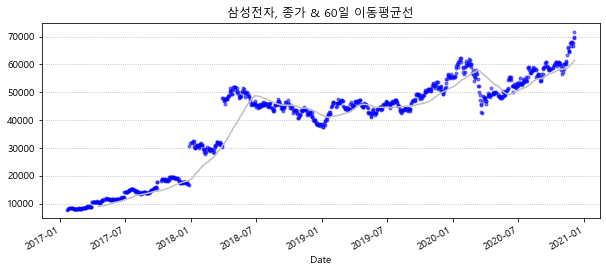

In [30]:
from datetime import datetime 

startday = datetime(2017,1,20) 
endday = datetime(2020,12,4)

# 삼성전자를 가져오는 경우
samsung = pdr.get_data_yahoo('005930.KS', startday, endday)
# 삼성증권
# samsung = pdr.get_data_yahoo('016360.KS', startday, endday)

'''
samsung.reset_index(inplace=True)
samsung['Date'] = pd.to_datetime(samsung['Date'])

# Set the date as index 
samsung.set_index('Date', inplace=True)
'''
plt.figure(figsize=(10,4))
samsung['Adj Close'].plot(style='b.', alpha=0.5)
# 이동평균선 추가
plt.plot(samsung['Adj Close'].rolling(60).mean(), color='silver')
# 중앙점 기준으로 이동평균선 이동
# plt.plot(samsung['Adj Close'].rolling(60, min_periods=30).mean().shift(-30), 
#         color='skyblue', linewidth=10, alpha=0.5)

plt.title('삼성전자, 종가 & 60일 이동평균선')
plt.grid(linestyle=':', axis='y') # 가로 보조선만 추가
plt.show()


In [25]:
# 주식종목 코드 조회
stockcode = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

cmpname = '삼성전자'
# cmpname = '삼성증권'

stockcode[stockcode['회사명']==cmpname]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
1213,삼성증권,16360,금융 지원 서비스업,"유가증권의 매매,위탁매매,인수주선",1988-03-28,12월,장석훈,http://www.samsungpop.com,서울특별시


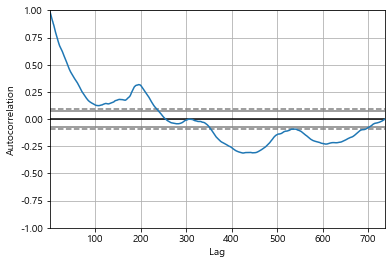

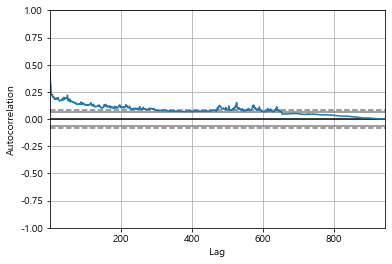

In [29]:
# AutoCorrelation

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(cdf.AdjClose_SnP500)
plt.show()

autocorrelation_plot(samsung)
plt.show()

# 시간적으로 가까운 값일 수록 (=lag가 작을수록) 강한 양의 관계
# 주기성(e.g.계절성)이 존재하는지 확인, 얼마나 긴 기간의 lag를 변수로 사용할 것인지에 참고

### [추세-계절 분해] 계절성이 존재하는 경우

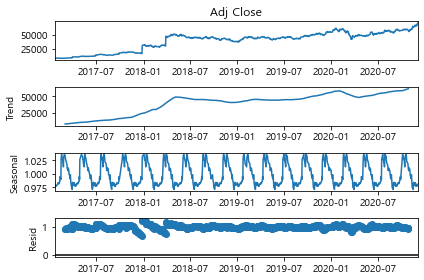

In [31]:
# 추세-계절 분해

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(samsung['Adj Close'], model='multiplicative', 
                            freq=52) # multiplicative or additive
result.plot()
plt.show()

In [32]:
# Access the components via:

# 결과는 series 형식
result.trend.tail(30)
# result.seasonal.tail(30)

Date
2020-10-26    61150.000000
2020-10-27    61302.884615
2020-10-28    61468.269231
2020-10-29    61670.192308
2020-10-30             NaN
2020-11-02             NaN
2020-11-03             NaN
2020-11-04             NaN
2020-11-05             NaN
2020-11-06             NaN
2020-11-09             NaN
2020-11-10             NaN
2020-11-11             NaN
2020-11-12             NaN
2020-11-13             NaN
2020-11-16             NaN
2020-11-17             NaN
2020-11-18             NaN
2020-11-19             NaN
2020-11-20             NaN
2020-11-23             NaN
2020-11-24             NaN
2020-11-25             NaN
2020-11-26             NaN
2020-11-27             NaN
2020-11-30             NaN
2020-12-01             NaN
2020-12-02             NaN
2020-12-03             NaN
2020-12-04             NaN
Name: trend, dtype: float64

In [33]:
# 원래 시계열값과 비교해 보기 위해서
# trend와 seasonal 값을 하나의 df로
dfts = pd.DataFrame([result.trend, result.seasonal]).transpose()
dfts['adjClose'] = samsung['Adj Close']

# null 이 존재하는 row는 버리고 -- 상관계수 구하기 불가하므로
dfts.dropna(inplace=True)
dfts.tail()

,trend,seasonal,adjClose
Date,,,
2020-10-23,61004.807692,1.022078,60200.0
2020-10-26,61150.000000,1.020121,60400.0
2020-10-27,61302.884615,1.019041,59800.0
2020-10-28,61468.269231,1.014652,59000.0
2020-10-29,61670.192308,1.009469,58100.0


In [34]:
# 상관관계 테이블 생성
dfts.corr()

,trend,seasonal,adjClose
trend,1.000000,0.018813,0.990060
seasonal,0.018813,1.000000,0.057198
adjClose,0.990060,0.057198,1.000000


,date,uniclo,daiso,abcmart
0,2016-10-30,52,51,6
1,2016-11-06,37,57,7
2,2016-11-13,46,64,6
3,2016-11-20,48,50,6
4,2016-11-27,37,52,10


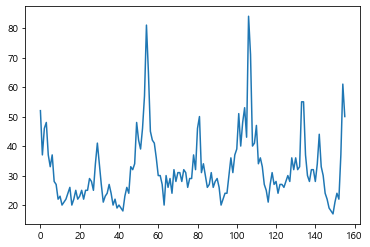

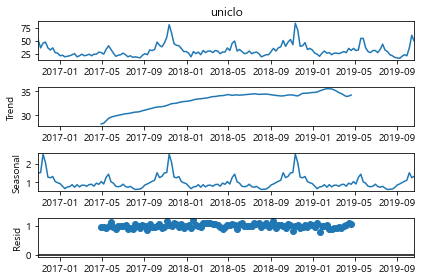

In [38]:
unicloGT = pd.read_csv(dataPath + 'unicloGT_20191026.csv')
display(unicloGT.head())
plt.plot(unicloGT.uniclo)
plt.show()
unicloGT['date'] = pd.to_datetime(unicloGT['date'])
# Set the date as index 
unicloGT = unicloGT.set_index('date')


# 추세-계절 분해

from statsmodels.tsa.seasonal import seasonal_decompose

series = unicloGT.uniclo
result = seasonal_decompose(series, model='multiplicative', freq=52) # multiplicative or additive
result.plot()
plt.show()

[실전적 방안] 계절성이 존재한다고 판단된다면 연도별 월별 overaly와 연도단위 변화 추이를 구분해서 시각화?